In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test1.jpg ------------------------
predicted object car: 96.52%


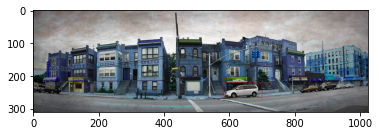

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test10.jpg ------------------------
predicted object car: 89.00%
predicted object car: 65.11%
predicted object car: 63.80%


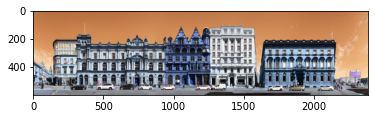

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test2.jpg ------------------------
predicted object motorcycle: 67.31%
predicted object bus: 61.95%
predicted object auto: 61.04%


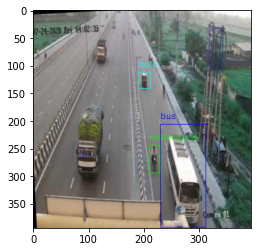

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test3.jpg ------------------------
predicted object car: 96.31%
predicted object car: 96.28%
predicted object car: 94.88%
predicted object car: 89.38%
predicted object car: 84.36%
predicted object motorcycle: 79.73%
predicted object motorcycle: 78.47%
predicted object car: 69.30%


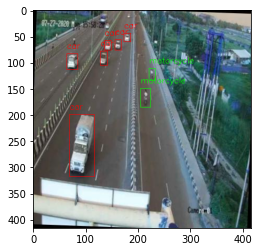

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test4.jpg ------------------------
predicted object car: 94.02%
predicted object car: 88.05%
predicted object motorcycle: 74.60%


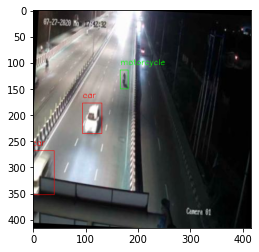

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test5.jpg ------------------------
predicted object multiaxle: 82.74%


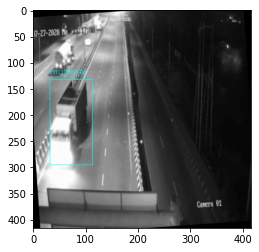

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test6.jpg ------------------------
predicted object car: 97.35%
predicted object car: 92.45%
predicted object motorcycle: 90.19%
predicted object car: 88.28%


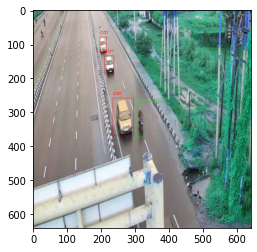

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test7.jpg ------------------------
predicted object car: 98.60%
predicted object car: 91.24%
predicted object car: 91.16%


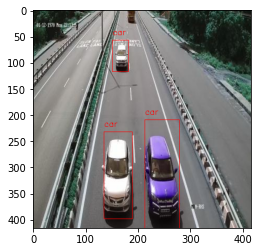

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test8.jpg ------------------------
predicted object car: 92.95%
predicted object car: 92.62%
predicted object car: 89.93%
predicted object car: 78.27%
predicted object motorcycle: 78.14%
predicted object truck: 61.68%


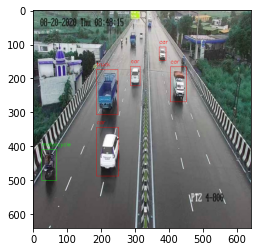

------------------------ /content/drive/MyDrive/vehicle/Vehicle_test_dataset/test9.jpg ------------------------
predicted object car: 98.25%
predicted object car: 98.14%
predicted object car: 97.02%
predicted object car: 96.99%
predicted object car: 96.95%
predicted object car: 96.04%
predicted object car: 95.98%
predicted object car: 95.93%
predicted object car: 95.58%
predicted object car: 91.43%
predicted object car: 86.94%
predicted object car: 82.63%
predicted object car: 82.35%
predicted object car: 80.10%
predicted object car: 78.95%


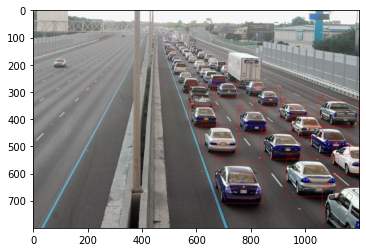

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob 
filenames = [imgs for imgs in glob.glob("/content/drive/MyDrive/vehicle/Vehicle_test_dataset/*.jpg")]

filenames.sort() # ADD THIS LINE

images = []
for imgs in filenames:
    img= cv2.imread(imgs)
    images.append(img)
    print("------------------------",imgs,"------------------------")
    with open("/content/drive/MyDrive/vehicle/files/output.txt", "a") as f:
        print("---------------------",imgs,"--------------------------",file=f)
        
   
    img_width = img.shape[1]
    img_height = img.shape[0]

#

    img_blob = cv2.dnn.blobFromImage(img, 1/255, (416,416), swapRB=True, crop=False)

    labels = ["auto","bus","car","lcv","motorcycle","multiaxle","tractor","truck"]


    colors = ["0,255,255","0,0,255","255,0,0","255,255,0","0,255,0"]
    colors = [np.array(color.split(",")).astype("int") for color in colors]
    colors = np.array(colors)
    colors = np.tile(colors,(18,1))

#

    model = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/vehicle/backup/vehicle_yolov4.cfg","/content/drive/MyDrive/vehicle/backup/vehicle_yolov4_last.weights")

    layers = model.getLayerNames()
    output_layer = [layers[layer-1] for layer in model.getUnconnectedOutLayers()]

    model.setInput(img_blob)

    detection_layers = model.forward(output_layer)


    ############## NON-MAXIMUM SUPPRESSION - OPERATION 1 ###################

    ids_list = []
    boxes_list = []
    confidences_list = []

    ############################ END OF OPERATION 1 ########################

#

    for detection_layer in detection_layers:
        for object_detection in detection_layer:
        
            scores = object_detection[5:]
            predicted_id = np.argmax(scores)
            confidence = scores[predicted_id]
        
            if confidence > 0.60:
            
                label = labels[predicted_id]
                bounding_box = object_detection[0:4] * np.array([img_width,img_height,img_width,img_height])
                (box_center_x, box_center_y, box_width, box_height) = bounding_box.astype("int")
            
                start_x = int(box_center_x - (box_width/2))
                start_y = int(box_center_y - (box_height/2))
            
            
                ############## NON-MAXIMUM SUPPRESSION - OPERATION 2 ###################
            
                ids_list.append(predicted_id)
                confidences_list.append(float(confidence))
                boxes_list.append([start_x, start_y, int(box_width), int(box_height)])
            
                ############################ END OF OPERATION 2 ########################
         
            
   ############## NON-MAXIMUM SUPPRESSION - OPERATION 3 ###################
            
    max_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, 0.5, 0.4)
     
    for max_id in max_ids:
    
        max_class_id = max_id
        box = boxes_list[max_class_id]
    
        start_x = box[0] 
        start_y = box[1] 
        box_width = box[2] 
        box_height = box[3] 
     
        predicted_id = ids_list[max_class_id]
        label = labels[predicted_id]
        confidence = confidences_list[max_class_id]
  
       ############################ END OF OPERATION 3 ########################
            
        end_x = start_x + box_width
        end_y = start_y + box_height
            
        box_color = colors[predicted_id]
        box_color = [int(each) for each in box_color]
            
            
        label = "{}".format(label)
        with open("/content/drive/MyDrive/vehicle/files/output.txt", "a") as f:

          print("predicted object {}: {:.2f}%".format(label,confidence*100))
          print("predicted object {}: {:.2f}%".format(label,confidence*100),file=f)

            
        cv2.rectangle(img, (start_x,start_y),(end_x,end_y),box_color,1)
        cv2.putText(img,label,(start_x,start_y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)
          

    plt.imshow(img)
    plt.show()